In [1]:
import numpy as np
import pandas as pd
from numpy import *

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


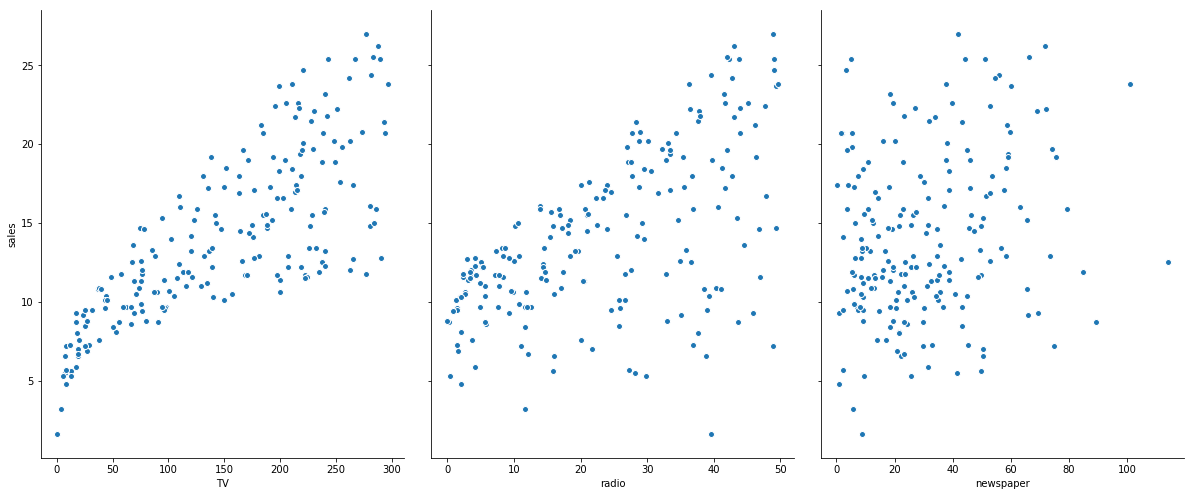

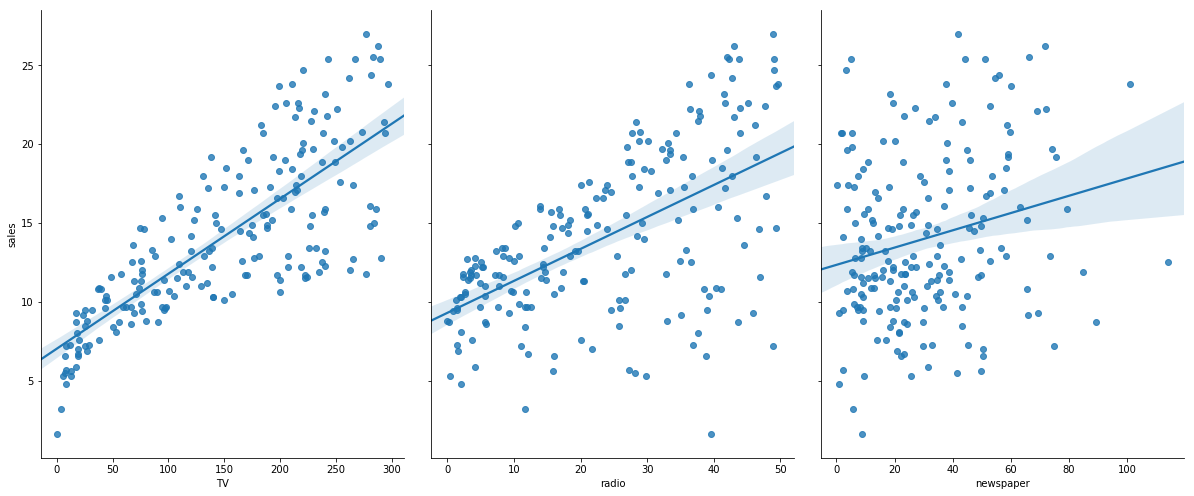

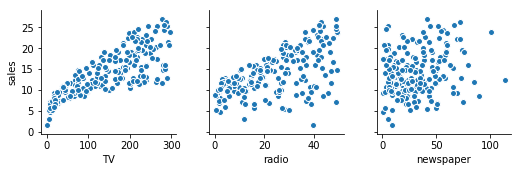

In [5]:
import seaborn as sns
import matplotlib

sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.8)
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')
sns.pairplot(data,x_vars=['TV', 'radio', 'newspaper'], y_vars='sales')

In [4]:
# 计算相关系数矩阵
data.corr()

# 构建X、Y数据集
X = data[['TV', 'radio', 'newspaper']]
X.head()

y = data['sales']
y.head()

#通过正规方程求解最小二乘
##直接根据系数矩阵公式计算
def standRegres(xArr, yArr):
    xMat = mat(xArr);
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")   #奇异矩阵不能求逆
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

# 求解回归方程系数
X2 = X
X2['intercept'] = [1] * 200
standRegres(X2, y)


##利用sklearn求解
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X, y)
#打印偏置
print (linreg.intercept_)
#打印相关系数
print (linreg.coef_)
print (zip(['TV', 'radio', 'newspaper'], linreg.coef_))

##测试集和训练集的构建 交叉验证
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
# 结果
print (linreg.intercept_)
print (linreg.coef_)
print (zip(['TV', 'Radio', 'Newspaper'], linreg.coef_))

# 预测
y_pred = linreg.predict(X_test)

# 误差评估
from sklearn import metrics

# calculate MAE using scikit-learn
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

##去除newspaper特征 模型比较
feature_cols = ['TV', 'radio']

X = data[feature_cols]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# calculate MAE using scikit-learn
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.938889369459405
[ 0.04576465  0.18853002 -0.00103749  0.        ]
2.8769666223179318
[0.04656457 0.17915812 0.00345046 0.        ]
MAE: 1.0668917082595208
MSE: 1.9730456202283368
RMSE: 1.404651423032895
MAE: 1.04775904112126
MSE: 1.9262760418667424
RMSE: 1.3879034699382888


C:\Users\matri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
